In [1]:
# Import libraries.


import pandas as pd
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
from time import time
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Setting prefered options. 


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [49]:
# Function uses coinmarketcap API to store data periodically in a csv located in the specified folder.


def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '2d27253f-fc0f-4870-9e3a-5a8b42052865',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df.set_index('id', inplace = True)
    if not os.path.isfile(r'D:\Data Projects\Python\CryptoAutoDataCollector.csv'):
        df.to_csv(r'D:\Data Projects\Python\CryptoAutoDataCollector.csv', header = 'column_names')
    else:
        df.to_csv(r'D:\Data Projects\Python\CryptoAutoDataCollector.csv',mode = 'a', header = False, index_label = 'id')
        
    

In [52]:
# Runs api_runner 300 times in 9 hours to collect data.
# You can choose the  time elapsed between each data collection. sleep(288) this woul be for it to get done in 24 hours.

for i in range (300): 
    api_runner()
    print ('DataFrame updated succesfully')
    sleep(100)
exit()

DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame updated succesfully
DataFrame 

In [3]:
# Reads the csv, takes the values we are interested in and reformats the df to make a visualization.


df = pd.read_csv(r'D:\Data Projects\Python\CryptoAutoDataCollector.csv')

df2 = df.groupby('name' , sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

df3 = df2.stack()

df4 = df3.to_frame(name = 'values')

df4.reset_index(inplace = True)
df4.rename(columns={'level_1': 'percent_change'}, inplace = True)
df4['percent_change'] = df4['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10960,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.967676e+07,1.967676e+07,...,52.7832,1.518030e+12,NaN,2024-04-08T11:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-08 13:02:51.028455
1,1027,Ethereum,ETH,ethereum,8744,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.200705e+08,1.200705e+08,...,16.1171,4.344723e+11,NaN,2024-04-08T11:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-08 13:02:51.028455
2,825,Tether USDt,USDT,tether,81711,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,1.069013e+11,1.109426e+11,...,3.9648,1.109214e+11,NaN,2024-04-08T11:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-08 13:02:51.028455
3,1839,BNB,BNB,bnb,2133,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495350e+08,1.495350e+08,...,3.3204,8.950921e+10,NaN,2024-04-08T11:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-08 13:02:51.028455
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.455747e+08,5.735036e+08,...,3.0293,1.051064e+11,NaN,2024-04-08T11:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-08 13:02:51.028455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,5805,Avalanche,AVAX,avalanche,702,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.0,3.778905e+08,4.365801e+08,...,0.7021,3.582243e+10,NaN,2024-04-08T19:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-08 21:27:50.337462
4545,5994,Shiba Inu,SHIB,shiba-inu,787,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,5.892894e+14,5.895341e+14,...,0.6272,1.690240e+10,NaN,2024-04-08T19:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2024-04-08 21:27:50.337462
4546,1831,Bitcoin Cash,BCH,bitcoin-cash,873,2017-07-23T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'marketplace', ...",21000000.0,1.968893e+07,1.968893e+07,...,0.4997,1.435887e+10,NaN,2024-04-08T19:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-08 21:27:50.337462
4547,6636,Polkadot,DOT,polkadot-new,729,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.431500e+09,1.431500e+09,...,0.4772,1.283282e+10,NaN,2024-04-08T19:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-08 21:27:50.337462


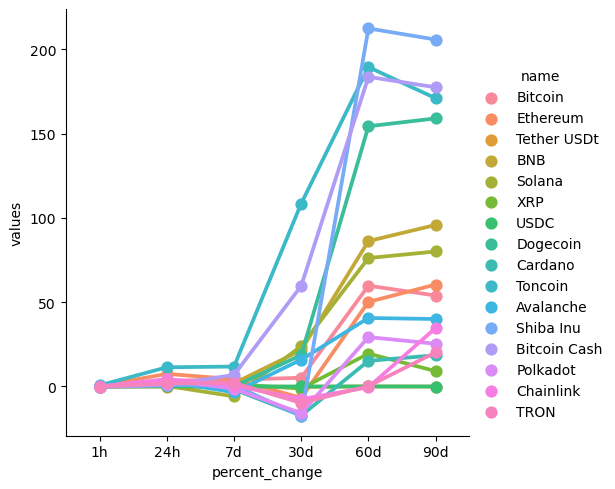

In [16]:
# Seaborn to visualize the evolution.


sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df4, kind = 'point')

In [17]:
# Different values to visualize, Bitcoin evolution during the 9 hours the data was extracted.


df5 = df[['name', 'quote.USD.price', 'timestamp']]
df5 = df5.query("name == 'Bitcoin'")

C:\Users\kuros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kuros\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

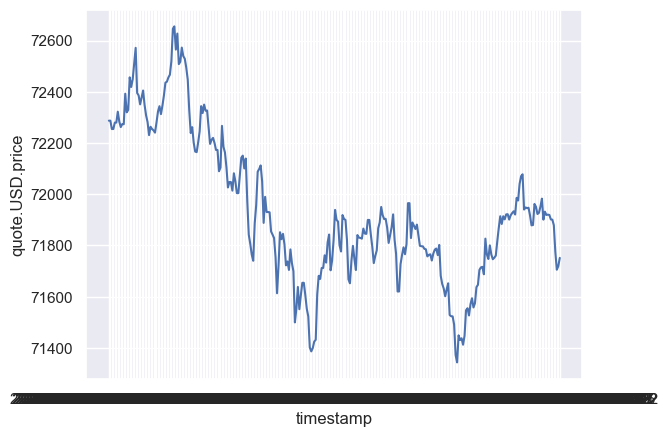

In [38]:
# Seaborn to visualize the evolution.


sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y = 'quote.USD.price', data = df5)